In [ ]:
!git clone https://github.com/umsi-amadaman/Quaker.git

Cloning into 'Quaker'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (7/7), 5.45 KiB | 5.45 MiB/s, done.


In [ ]:
class Vertex:
  def __init__(self, key):
    self.id = key
    self.connectedTo = {}
    self.degree = 0
  def addNeighbor(self, nbr, weight=0):
    self.connectedTo[nbr] = weight
  def getId(self):
    return self.id
  def getWeight(self, nbr):
    return self.connectedTo[nbr]
  def getConnections(self):
    return self.connectedTo.keys()
  def calcDegree(self):
     self.degree = len(self.connectedTo.keys())

  def __str__(self):
    #return str(self.id) + ‘is connected to ‘ + str((x.id, x.weight) for x in self.connectedTo)
    return str(self.id) + ' connectedTo: ' + str([x.id for x in self.connectedTo])

class Graph:
    def __init__(self):
        self.vertList = {}
        self.numVertices = 0

    def addVertex(self,key):
        self.numVertices = self.numVertices + 1
        newVertex = Vertex(key)
        self.vertList[key] = newVertex
        return newVertex

    def getVertex(self,n):
        if n in self.vertList:
            return self.vertList[n]
        else:
            return None

    def __contains__(self,n):
        return n in self.vertList

    def addEdge(self,f,t,weight=0):
        if f not in self.vertList:
            nv = self.addVertex(f)
        if t not in self.vertList:
            nv = self.addVertex(t)
        self.vertList[f].addNeighbor(self.vertList[t], weight)

    def getVertices(self):
        return self.vertList.keys()

    def __iter__(self):
        return iter(self.vertList.values())

- Open the file
- Read the csv
    - Retrieve the data (using Python list comprhension and list slicing to remove the header row, see footnote 3)


 - Get a list of only the node names
 - get a list of the edges

In [ ]:
import csv
with open('/content/Quaker/quakers_vertexlist.csv', 'r') as vertexcsv: # Open the file
    vertexreader = csv.reader(vertexcsv) # Read the csv
    # Retrieve the data (using Python list comprhension and list slicing to remove the header row, see footnote 3)
    vertices = [v for v in vertexreader][1:]

vertex_names = [v[0] for v in vertices] # Get a list of only the node names

with open('/content/Quaker/quakers_edgelist.csv', 'r') as edgecsv: # Open the file
    edgereader = csv.reader(edgecsv) # Read the csv
    edges = [tuple(e) for e in edgereader][1:] # Retrieve the data




In [ ]:
g = Graph()
for i in range(5):
    g.addVertex(i)
g.addEdge(0,1,5)
g.addEdge(0,5,2)

In [ ]:
quakers = Graph()
for v in vertex_names:
    quakers.addVertex(v)
for origin, dest in edges:
    quakers.addEdge(origin, dest)



In [ ]:
### Find the most connected Quaker
# def calcDegree(self):
#   self.degree = len(self.connectedTo.keys())

In [ ]:
quakers.vertList['William Penn'].connectedTo

{<__main__.Vertex at 0x79e60448d5a0>: 0,
 <__main__.Vertex at 0x79e60448f6a0>: 0,
 <__main__.Vertex at 0x79e604470cd0>: 0,
 <__main__.Vertex at 0x79e60448ca60>: 0,
 <__main__.Vertex at 0x79e60448fd00>: 0,
 <__main__.Vertex at 0x79e60448d4b0>: 0,
 <__main__.Vertex at 0x79e60448da20>: 0}

In [ ]:
from collections import deque

def BFS(graph, start_vertex):
    # Initialize the discovered list for all vertices in the graph
    discovered = {key: False for key in graph.getVertices()}
    queue = deque([start_vertex])
    discovered[start_vertex] = True

    while queue:
        current_vertex = queue.popleft()
        print(f"Visited {current_vertex}")

        # Access each neighbor of the current vertex
        for neighbor in graph.vertList[current_vertex].connectedTo:
            neighbor_id = neighbor.getId()

            # If the neighbor hasn't been discovered yet, visit it
            if not discovered[neighbor_id]:
                discovered[neighbor_id] = True
                queue.append(neighbor_id)

g = Graph()
for i in range(6):
    g.addVertex(i)
g.addEdge(2, 0, 3)
g.addEdge(2, 3, 4)
g.addEdge(2, 4, 1)
g.addEdge(0, 1, 5)
g.addEdge(0, 5, 2)

# Perform BFS from vertex 2
BFS(g, 2)

Visited 2
Visited 0
Visited 3
Visited 4
Visited 1
Visited 5


In [ ]:
ConnectedQuakers ={}
for key in quakers.vertList.keys():
  #print(keys)
  quakers.vertList[key].calcDegree()
  #print(key, quakers.vertList[key].degree)
  ConnectedQuakers[key] = quakers.vertList[key].degree

ConnectedQuakers

Connected_Quakers_Sorted = dict(sorted(ConnectedQuakers.items(), key=lambda item:item[1], reverse=True))

In [ ]:
ConnectedQuakers

{'Joseph Wyeth': 1,
 'Alexander Skene of Newtyle': 1,
 'James Logan': 3,
 'Dorcas Erbery': 1,
 'Lilias Skene': 0,
 'William Mucklow': 1,
 'Thomas Salthouse': 1,
 'William Dewsbury': 3,
 'John Audland': 6,
 'Richard Claridge': 0,
 'William Bradford': 2,
 'Fettiplace Bellers': 0,
 'John Bellers': 1,
 'Isabel Yeamans': 1,
 'George Fox the younger': 1,
 'George Fox': 17,
 'John Stubbs': 4,
 'Anne Camm': 0,
 'John Camm': 3,
 'Thomas Camm': 2,
 'Katharine Evans': 1,
 'Lydia Lancaster': 1,
 'Samuel Clarridge': 1,
 'Thomas Lower': 1,
 'Gervase Benson': 1,
 'Stephen Crisp': 2,
 'James Claypoole': 0,
 'Thomas Holme': 0,
 'John Freame': 1,
 'John Swinton': 1,
 'William Mead': 1,
 'Henry Pickworth': 1,
 'John Crook': 2,
 'Gilbert Latey': 2,
 'Ellis Hookes': 0,
 'Joseph Besse': 2,
 'James Nayler': 12,
 'Elizabeth Hooten': 0,
 'George Whitehead': 6,
 'John Whitehead': 0,
 'William Crouch': 0,
 'Benjamin Furly': 4,
 'Silvanus Bevan': 1,
 'Robert Rich': 1,
 'John Whiting': 1,
 'Christopher Taylor': 0,

In [ ]:
from collections import deque

# a modified BFS is adapted to keep track of all the paths from a start vertex to all the other vertices
# this allows identifying all the shortest paths and the number
# presence on those shortest paths is measured as betweenness centrality

def BFS(graph, start_vertex, distances, predecessors, path_counts):
    # Initialize the BFS queue with the start vertex
    distances[start_vertex] = 0
    path_counts[start_vertex] = 1
    queue = deque([start_vertex])

    while queue:
        # Dequeue the next vertex to process
        current_vertex = queue.popleft()

        # Iterate over all neighbors of the current vertex
        for neighbor in graph.vertList[current_vertex].connectedTo:
            neighbor_id = neighbor.getId()

            # Check if this neighbor has been discovered by checking its distance
            if distances[neighbor_id] == -1:
                # Mark the neighbor as discovered and add it to the queue
                distances[neighbor_id] = distances[current_vertex] + 1
                queue.append(neighbor_id)

            # If this neighbor is exactly one level deeper, count the path
            if distances[neighbor_id] == distances[current_vertex] + 1:
                # Add the current vertex as a predecessor for dependency calculations
                predecessors[neighbor_id].append(current_vertex)
                # Accumulate the number of shortest paths leading to this neighbor
                path_counts[neighbor_id] += path_counts[current_vertex]

def calculate_betweenness_centrality(graph):
    betweenness_centrality = {v: 0.0 for v in graph.vertList}
    vertices = list(graph.vertList.keys())
    n = len(vertices)

    # Loop through each vertex to treat it as the source
    for node in vertices:
        # Initialize BFS-related dictionaries
        distances = {v: -1 for v in vertices}  # Distance from the source
        predecessors = {v: [] for v in vertices}  # Predecessors in shortest paths
        path_counts = {v: 0 for v in vertices}  # Number of shortest paths to each vertex

        # Perform BFS to calculate shortest paths from 'node'
        BFS(graph, node, distances, predecessors, path_counts)

        # Dependency accumulation phase to calculate betweenness
        dependency = {v: 0.0 for v in vertices}
        # Process each vertex in reverse distance order
        for current_vertex in reversed(vertices):
            # Propagate dependencies back to predecessors
            for predecessor in predecessors[current_vertex]:
                ratio = path_counts[predecessor] / path_counts[current_vertex]
                dependency[predecessor] += ratio * (1 + dependency[current_vertex])
            # Accumulate the betweenness score for non-source vertices
            if current_vertex != node:
                betweenness_centrality[current_vertex] += dependency[current_vertex]

    # Optional normalization for undirected graphs
    '''
    if n > 2:
        scale = 1.0 / ((n - 1) * (n - 2))
        for vertex in betweenness_centrality:
            betweenness_centrality[vertex] *= scale
    '''

    return betweenness_centrality


# Example graph
graph = Graph()
graph.addEdge('A', 'B')
graph.addEdge('A', 'C')
graph.addEdge('B', 'D')
graph.addEdge('C', 'D')
graph.addEdge('D', 'E')

betweenness_centrality = calculate_betweenness_centrality(graph)

# Print the betweenness centrality values
for node, centrality in betweenness_centrality.items():
    print(f"{node}: Betweenness Centrality = {centrality}")





A: Betweenness Centrality = 0.0
B: Betweenness Centrality = 1.0
C: Betweenness Centrality = 1.0
D: Betweenness Centrality = 3.0
E: Betweenness Centrality = 0.0


In [ ]:
QuakerCentrality = calculate_betweenness_centrality(quakers)

# Print the betweenness centrality values
for node, centrality in QuakerCentrality.items():
    print(f"{node}: Betweenness Centrality = {centrality}")

Joseph Wyeth: Betweenness Centrality = 0.0
Alexander Skene of Newtyle: Betweenness Centrality = 0.0
James Logan: Betweenness Centrality = 3.0
Dorcas Erbery: Betweenness Centrality = 0.0
Lilias Skene: Betweenness Centrality = 0.0
William Mucklow: Betweenness Centrality = 0.0
Thomas Salthouse: Betweenness Centrality = 0.0
William Dewsbury: Betweenness Centrality = 0.0
John Audland: Betweenness Centrality = 0.0
Richard Claridge: Betweenness Centrality = 0.0
William Bradford: Betweenness Centrality = 0.5
Fettiplace Bellers: Betweenness Centrality = 0.0
John Bellers: Betweenness Centrality = 0.0
Isabel Yeamans: Betweenness Centrality = 0.0
George Fox the younger: Betweenness Centrality = 0.0
George Fox: Betweenness Centrality = 150.44047619047618
John Stubbs: Betweenness Centrality = 20.5
Anne Camm: Betweenness Centrality = 0.0
John Camm: Betweenness Centrality = 1.3333333333333333
Thomas Camm: Betweenness Centrality = 2.3333333333333335
Katharine Evans: Betweenness Centrality = 0.0
Lydia L

In [ ]:
between_quakers = {node: centrality for node, centrality in QuakerCentrality.items()}

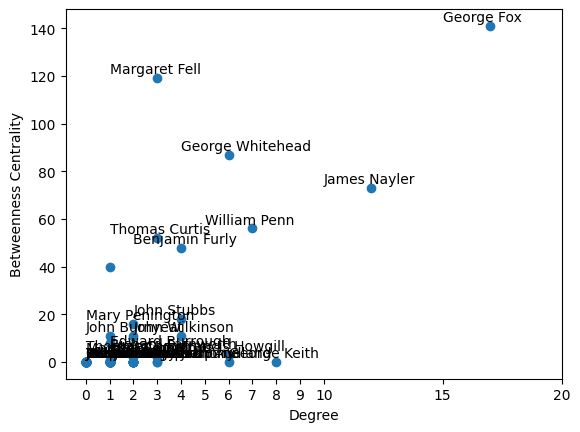

In [ ]:
import matplotlib.pyplot as plt

QuakerMembers = list(ConnectedQuakers.keys())
QCentrality = [QuakerCentrality[key] for key in QuakerMembers]
QDegree = [ConnectedQuakers[key] for key in QuakerMembers]

fig, ax = plt.subplots()
ax.scatter(QDegree, QCentrality)


for i, txt in enumerate(QuakerMembers):
   ax.annotate(txt, ((QDegree[i]-2), QCentrality[i]+2))
ax.set_ylabel('Betweenness Centrality')
ax.set_xlabel('Degree')
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,15,20]);

In [ ]:
# who are the top 6 in Centrality
#we sort the dictionary by its values in ascending order using the sorted() function and
#a lambda function that specifies that the items in the dictionary should be sorted by their second element (i.e., their value).
sorted_centrality = dict(sorted(between_quakers.items(), key=lambda item:item[1], reverse=True))

for name, centrality in sorted_centrality.items():
    print(name, centrality, ConnectedQuakers[name])

George Fox 141.0 17
Margaret Fell 119.0 3
George Whitehead 87.0 6
James Nayler 73.0 12
William Penn 56.0 7
Thomas Curtis 52.0 3
Benjamin Furly 48.0 4
Alexander Parker 40.0 1
John Stubbs 18.0 4
Mary Penington 16.0 2
John Burnyeat 11.0 2
John Wilkinson 11.0 4
Robert Barclay 11.0 1
John Story 8.0 1
Edward Burrough 5.0 3
Richard Farnworth 4.0 3
Francis Howgill 3.0 6
Thomas Camm 3.0 2
James Logan 3.0 3
Martha Simmonds 2.0 2
John Camm 2.0 3
Samuel Clarridge 1.0 1
Hannah Stranger 0.0 0
John Perrot 0.0 0
Samuel Bownas 0.0 0
William Simpson 0.0 0
Thomas Ellwood 0.0 0
Thomas Story 0.0 0
Lewis Morris 0.0 1
David Lloyd 0.0 0
Dorothy Waugh 0.0 0
Mary Pennyman 0.0 0
Humphrey Woolrich 0.0 1
Charles Marshall 0.0 0
John Penington 0.0 1
Daniel Quare 0.0 0
Edward Pyott 0.0 0
Sarah Cheevers 0.0 0
William Edmundson 0.0 0
Rebecca Travers 0.0 2
Solomon Eccles 0.0 1
Anthony Pearson 0.0 0
John Rous 0.0 0
John ap John 0.0 1
Edward Haistwell 0.0 1
John Bartram 0.0 0
Mary Prince 0.0 1
Grace Chamber 0.0 0
John Wan

In [ ]:
#notice that there are 2 women, Margaret Fell and Mary Pennington in the top 6 in centrality.
#yet their degree is 3 and 2 respsectively
print(ConnectedQuakers['Margaret Fell'])
print(ConnectedQuakers['Mary Penington'])

3
2


In [ ]:
# Margaret Fell is the wife of George Fox and initially history thought of her solely in that role.
# But network analysis and historical data have identified a more significant historical role.
# After the death of George Fox in 1691, the Quaker movement became divided into two factions:
# the "Quietists" and the "Gurneyites." The Quietists believed in a more inward-focused spirituality and
# rejected the outward expressions of Quakerism, such as vocal ministry and public meetings. The Gurneyites,
# on the other hand, believed in a more outward-focused approach and supported the use of vocal ministry and
# public meetings as a means of spreading the Quaker message.
# Margaret Fell, who had been a close confidante of George Fox, was respected by both factions and played
# an important role in bridging the divide between them. She urged both sides to seek unity and to focus on the
# core principles of Quakerism, such as equality, simplicity, and peace. She also used her influence to mediate
# disputes between the two factions and to encourage them to work together for the good of the movement.

# Margaret Fell's efforts to promote unity and cooperation between the two factions were critical to the survival
# and growth of the Quaker movement. Her leadership and diplomatic skills helped to prevent a permanent split in
#the movement and to preserve its core principles and values.
